<a href="https://colab.research.google.com/github/abhi-0087/Social-Media-Data-Analysis-for-Ola-Cabs/blob/main/Social_Media_Data_Analysis_for_Ola_Cabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_json('/content/Ola (1).json')

In [ ]:
# 1. Data Cleaning and Preparation
# Handle missing values
data.fillna({'content': '', 'datetime': '', 'likes': 0, 'shares': 0, 'views': 0}, inplace=True)

In [ ]:
# Remove duplicates
data.drop_duplicates(subset=['tweet_id'], inplace=True)


In [ ]:
# 2. Descriptive Analysis
# a. Calculate basic statistics
engagement_metrics = ['likes', 'shares', 'views']

# Calculate mean
mean_stats = data[engagement_metrics].mean()

# Calculate median
median_stats = data[engagement_metrics].median()

# Calculate mode
mode_stats = data[engagement_metrics].mode()

# Display basic statistics
print("Mean Stats:\n", mean_stats)
print("\nMedian Stats:\n", median_stats)
print("\nMode Stats:\n", mode_stats)

Mean Stats:
 likes       164.199921
shares       38.520899
views     14359.786672
dtype: float64

Median Stats:
 likes      0.0
shares     0.0
views     27.0
dtype: float64

Mode Stats:
    likes  shares  views
0      0       0    0.0


In [ ]:
# b. Identify top 5 posts by engagement
data['engagement'] = data['likes'] + data['shares'] + data['comments'].apply(len)
top_5_posts = data.nlargest(5, 'engagement')[['content', 'engagement']]

print("Top 5 Posts by Engagement:\n", top_5_posts)

Top 5 Posts by Engagement:
                                                content  engagement
30   HELP WANTED Tons of PAID work opportunities fo...       23495
592                             lay off 17.50 5 access       20754
382  Who said the job market is bad? Just complain ...       20548
723  I am getting laid off 12/31 but I am going to ...       18682
202  While the OLA electric CEO rants on someone el...       16767


In [ ]:
# c. Count posts with media attachments
media_posts_count = data['media'].apply(lambda x: len(x) if isinstance(x, list) else 0).sum()

print(f"Number of posts with media attachments: {media_posts_count}")

Number of posts with media attachments: 1038


In [ ]:
# 3. Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text).sentiment
    if analysis.polarity > 0:
        return 'Positive'
    elif analysis.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['sentiment'] = data['content'].apply(analyze_sentiment)


In [ ]:
# Calculate sentiment percentages
sentiment_distribution = data['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Distribution:\n", sentiment_distribution)



Sentiment Distribution:
 sentiment
Positive    39.747634
Neutral     36.119874
Negative    24.132492
Name: proportion, dtype: float64


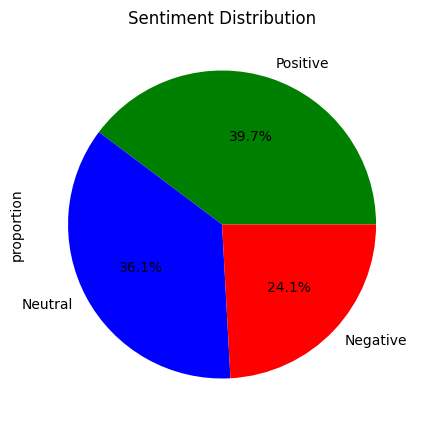

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(5, 5))
sentiment_distribution.plot.pie(autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# 4. Customer Complaints
# a. Extract complaints
complaints = data[data['content'].str.contains('driver|cancel|customer service', case=False)]


In [ ]:
# b. Categorize complaints
def categorize_complaint(text):
    if 'driver' in text.lower():
        return 'Driver Issue'
    elif 'cancel' in text.lower():
        return 'Cancellations'
    elif 'customer service' in text.lower():
        return 'Customer Service'
    else:
        return 'Other'

complaints['complaint_type'] = complaints['content'].apply(categorize_complaint)

<ipython-input-49-8fe4e21a65b3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints['complaint_type'] = complaints['content'].apply(categorize_complaint)


<ipython-input-39-553c380871b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaint_distribution.index, y=complaint_distribution.values, palette='viridis')


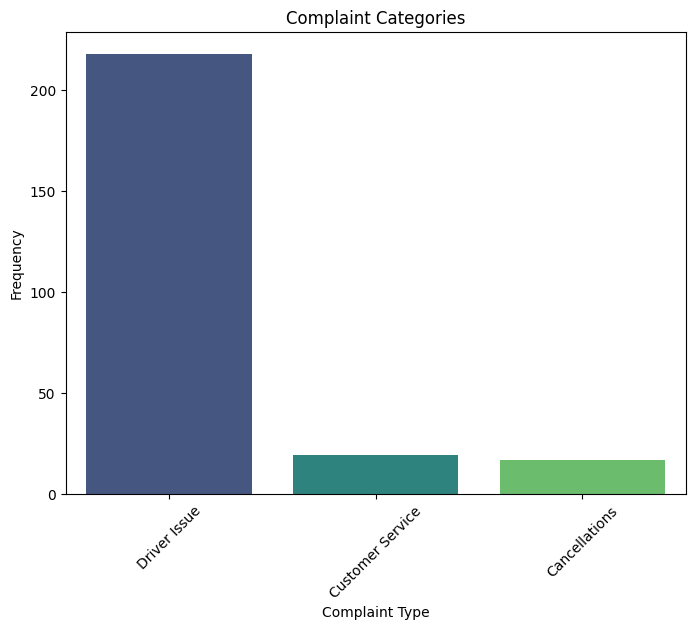

In [ ]:
# c. Visualize complaints
complaint_distribution = complaints['complaint_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=complaint_distribution.index, y=complaint_distribution.values, palette='viridis')
plt.title('Complaint Categories')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 5. Engagement Analysis
# a. Correlation analysis
correlation = data[['followers', 'likes', 'shares']].corr()

print("Correlation Analysis:\n", correlation)

Correlation Analysis:
            followers     likes    shares
followers   1.000000  0.061084  0.010560
likes       0.061084  1.000000  0.339056
shares      0.010560  0.339056  1.000000


In [ ]:
# b. Analyze engagement by source
engagement_by_source = data.groupby('source')['engagement'].mean()

print("Engagement by Source:\n", engagement_by_source)

Engagement by Source:
 source
TWITTER    207.286278
Name: engagement, dtype: float64
